Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>. You can find the same notes online at <a href="http://ajaytech.co/python-clustering"> Clustering in Python</a> or on <a href="https://github.com/ajaytech002/DataScience_Python/blob/master/week_4_ml_algorithms/day_16_clustering.ipynb"> Ajay Tech's github page</a>

# Clustering

## Contents

- What is Clustering
- k-means Clustering
  - Optimum **k** value 

### What is Clustering

Imagine weights of the students of three different classes (grades). Just to make the weight groups clearly distinguisable from each other, let's pick classes a bit far from each other - say 1st, 4th and 7th.

In [5]:
# code to reproduce the data

import numpy as np

# set the seed to make this reproducible
np.random.seed(100)

# samples per bucket
size = 5

# generate 10 numbers in a normal distribution with a set mean and sd.
# convert them into integers for simplicity

weights_1 = np.around(np.random.normal(20, 5, size)).astype(int)
weights_4 = np.around(np.random.normal(40, 5, size)).astype(int)
weights_7 = np.around(np.random.normal(70, 5, size)).astype(int)

Let's plot the data and mark that these are different sets of data.

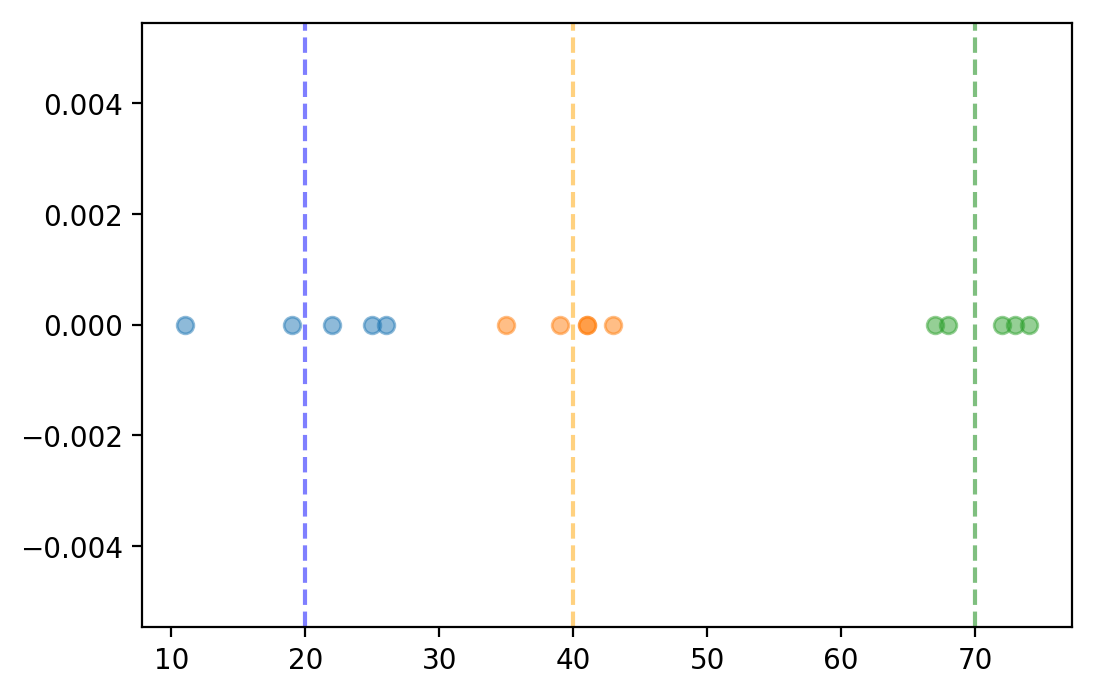

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

plt.scatter(weights_1, np.zeros(size),alpha=0.5)
plt.scatter(weights_4, np.zeros(size),alpha=0.5)
plt.scatter(weights_7, np.zeros(size),alpha=0.5)

# draw vertical lines at the mean points to show that these are three distinct groups
plt.axvline(20, linestyle="--",alpha=0.5, color="blue")
plt.axvline(40, linestyle="--",alpha=0.5, color="orange")
plt.axvline(70, linestyle="--",alpha=0.5, color="green")

The data seems pretty straight forward (now that we have colored and marked the mean. But clustering is the process of grouping data points into clusters automatically. Imagine giving this data to somebody without telling them the specific buckets - something like this.

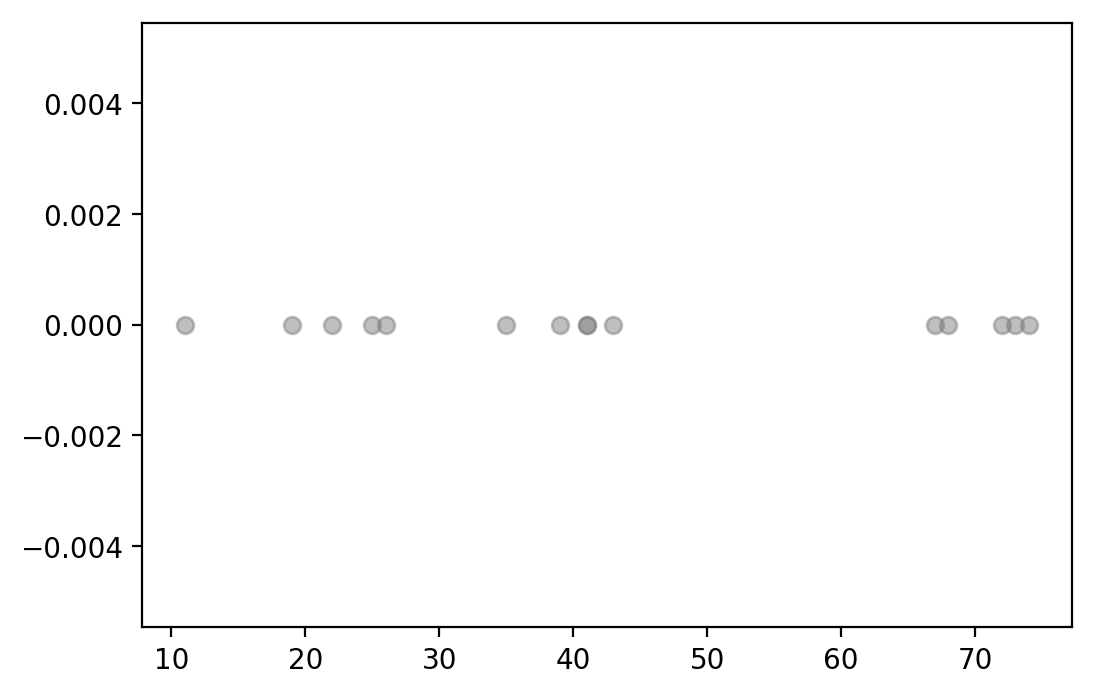

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

plt.scatter(weights_1, np.zeros(size),alpha=0.5, color="gray")
plt.scatter(weights_4, np.zeros(size),alpha=0.5, color="gray")
plt.scatter(weights_7, np.zeros(size),alpha=0.5, color="gray")

How would that person cluster the data into buckets ? Since this is data in just one dimension, human mind can intuitively do a whole lot of calculation. For example, just looking at the data anybody would be able to make out the following groups.

<img src="./pics/clustering-into-groups.png"/>

A couple of points here and there, but mostly the conclusion is pretty reasonable. If a machine does the same thing it is called clustering. There are many algorithms for clustering. 

- K-means clustering
- Mean shift clustering
- Hierarchical clustering etc

### k-means clustering

Let's see how k-means clustering can cluster this data automatically. Here is the algorithm steps.

- **Step 1** - Pick k points - Call them cluster centroids. At this poitn they are just random.
- **Step 2** - For each point in the dataset, find out the closest cluster centroid. Asssign that point to that cluster. After finishing step no. 2, each of the points belong to one of the **k** clusters.
- **Step 3** - Calculate the new centroid/mean of the cluster. Move the initial cluster centroids ( randomly set in step 1 ) to the new centroid. 

Continue **Step 2** and __Step 3__ until the centroids no longer change.

Let's do this manually for just two of the weight groups 
- weights_1
- weights_7

In [19]:
# combine these arrays into a single vector.
weights = np.concatenate((weights_1.ravel(), weights_7.ravel()))

In [20]:
weights

array([11, 22, 26, 19, 25, 68, 72, 67, 74, 73])

In [38]:
# Step 1
# pick 2 centroids at random. 
from random import randrange

centroid_1 = randrange( np.amin(weights),  np.amax(weights) )
centroid_2 = randrange( np.amin(weights),  np.amax(weights) )

In [39]:
centroid_1

65

In [40]:
centroid_2

55

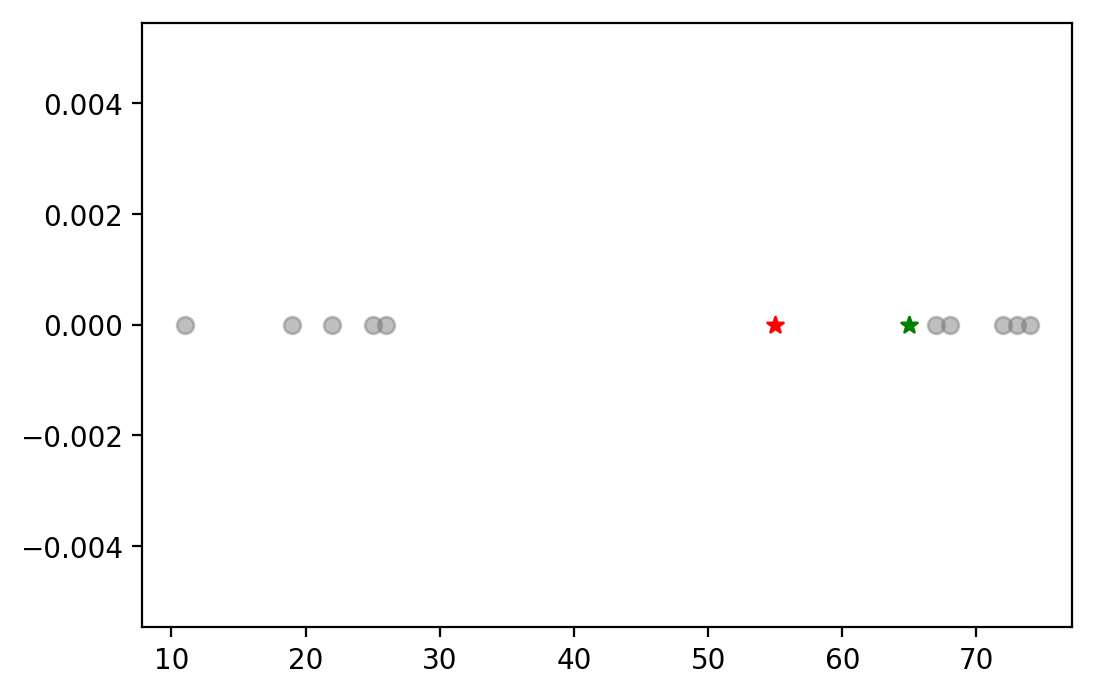

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

plt.scatter(weights, np.zeros(10),alpha=0.5, color="gray")
plt.scatter(centroid_1,0,color="green", marker="*")
plt.scatter(centroid_2,0,color="red", marker="*")

**Step 2** - Mark each point as closer to one cluster point or the other.

Visually, you can see that all the points to the left are closer to the red dot and all the points to the right are closer to the gree dot. 

<img src="./pics/nearest-cluster.png"/>

**Step 3** - Calculate the new centroids. 

In [85]:
weights = np.sort(weights)
weights

array([11, 19, 22, 25, 26, 67, 68, 72, 73, 74])

In [86]:
centroid_1 = np.array ([11, 19, 22, 25, 26,55]).mean()
centroid_2 = np.array ([ 67, 68, 72, 73, 74, 65]).mean()

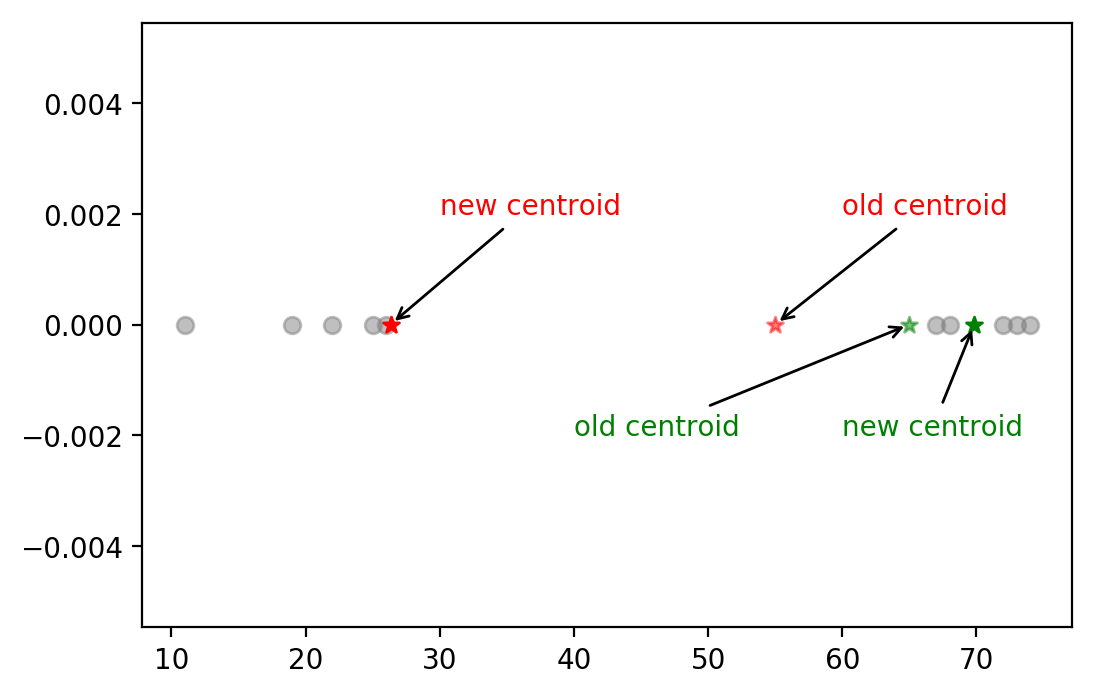

In [87]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

plt.scatter(weights, np.zeros(10),alpha=0.5, color="gray")
plt.scatter(centroid_1,0,color="red", marker="*")
plt.scatter(centroid_2,0,color="green", marker="*")

plt.scatter(55,0,color="red", marker="*", alpha=0.5)
plt.scatter(65,0,color="green", marker="*",alpha=0.5)

plt.annotate("old centroid", (55,0), arrowprops= dict(arrowstyle="->"),xytext=(60,0.002),color="red");
plt.annotate("new centroid", (centroid_1,0), arrowprops= dict(arrowstyle="->"),xytext=(30,0.002),color="red");

plt.annotate("new centroid", (centroid_2,0), arrowprops= dict(arrowstyle="->"),xytext=(60,-0.002),color="green");
plt.annotate("old centroid", (65,0), arrowprops= dict(arrowstyle="->"),xytext=(40,-0.002),color="green");

In [93]:
centroid_1_third = np.array ([11, 19, 22, 25, 26,centroid_1]).mean()
centroid_2_third = np.array ([ 67, 68, 72, 73, 74, centroid_2]).mean()

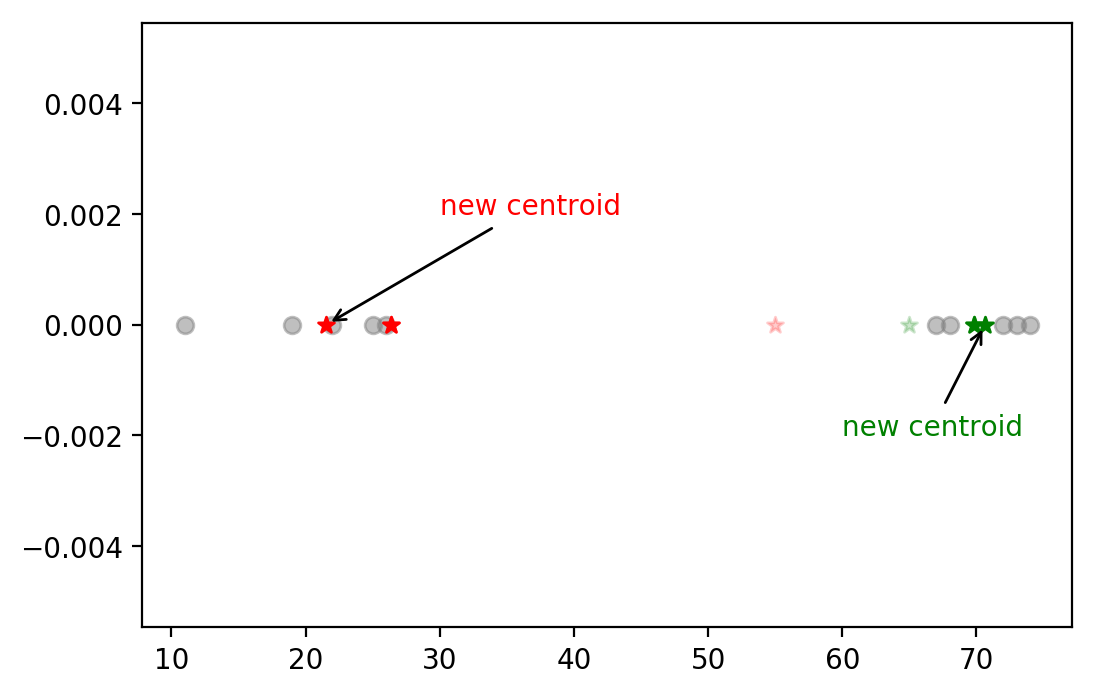

In [115]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

plt.scatter(weights, np.zeros(10),alpha=0.5, color="gray")
plt.scatter(centroid_1,0,color="red", marker="*")
plt.scatter(centroid_2,0,color="green", marker="*")

# centroid 1
plt.scatter(55,0,color="red", marker="*", alpha=0.2)
plt.scatter(65,0,color="green", marker="*",alpha=0.2)

# centroid 2
plt.scatter(centroid_1,0,color="red", marker="*", alpha=0.5)
plt.scatter(centroid_2,0,color="green", marker="*",alpha=0.5)

#centroid 3
plt.scatter(centroid_1_third,0,color="red", marker="*")
plt.scatter(centroid_2_third,0,color="green", marker="*")

plt.annotate("new centroid", (centroid_1_third,0), arrowprops= dict(arrowstyle="->"),xytext=(30,0.002),color="red");
plt.annotate("new centroid", (centroid_2_third,0), arrowprops= dict(arrowstyle="->"),xytext=(60,-0.002),color="green");


Do this repeatedly until the centroid no longer moves. That's it - That is **k means clustering**. Now, let's do it in python using scikit learn.

In [104]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(weights.reshape(-1,1))

In [105]:
kmeans.cluster_centers_

array([[70.8],
       [20.6]])

There you go, those are the clusters. Pretty close to our picture above, right ? Now, we can try to predict a point - say we want to where the following points fall ?
- 30
- 60
- 90
- 5
- 40
- 45

In [109]:
data = np.array([30,60,90,5,40,45]).reshape(-1,1)

predict_class = kmeans.predict(data)
predict_class

array([1, 0, 0, 1, 1, 1])

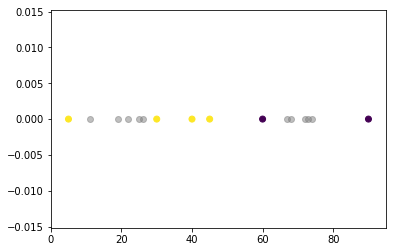

In [113]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(weights, np.zeros(10),alpha=0.5, color="gray")
plt.scatter(data,np.zeros(len(data)), c=predict_class)

All the yellow dots belong to the first cluster and the dark blue dots belong to the second cluster. 

Here is a quick visual of a smaller dataset in 2 dimensional space. What I want you to focus on is how the centroid moves with each iteration.

<img src="./pics/clustering-2d.png"/>

#### Optimum **k** value

Now, for the most important question, how do you find out what is the optimum **K** value. For example, in the previous example, we told the machine to classify the data into 2 clusters. Most of the time, you wouldn't know the number of clusters. In cases like that you need to find out what is the optimum __k__ value. That is where the sum of squared distances to the cluster comes in. It is also called _intertia_. It is available readymade as an attribute of the clustering model.

In [116]:
kmeans.inertia_

184.0

Now, to find out the optimum **k** value, let's iterate over 1 to 10 to find out the optimum _intertia_ or _sum of squares_.

In [122]:
# Hold the interia or sum of squard distances in this array
sum_squares = []

for i in range(1,10) :
    model = KMeans(n_clusters = i, max_iter = 100)
    model.fit(weights.reshape(-1,1))
    
    sum_squares.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared distances or Inertia')

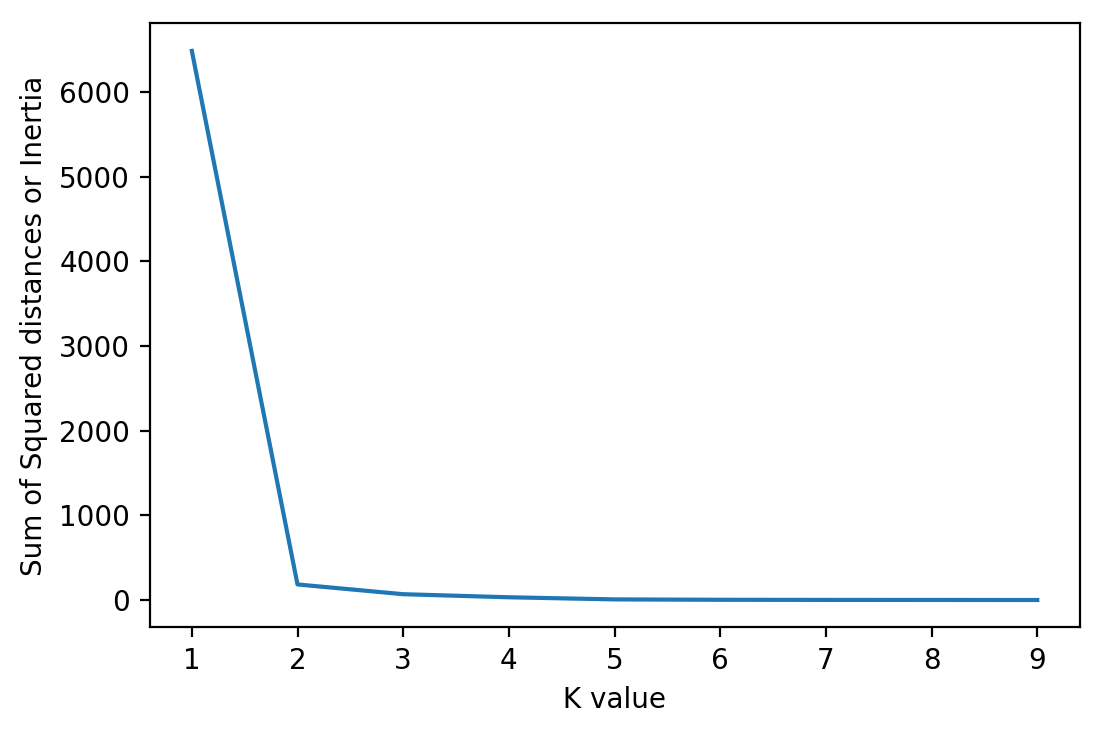

In [124]:
plt.plot( range(1,10), sum_squares)
plt.xlabel(" K value ")
plt.ylabel("Sum of Squared distances or Inertia")

This is called as an elbow plot - looks pretty much like an elbow, right ? Beyond the bend in the elbow (inflexion point), after a k-value of 2, there is no more decrease in _sum of squared distances_ or _interia_. So, the optimum **k** value in this case is 2 - which is correct.

Let's add the third weight category as well and see if this changes.

In [125]:
# combine these arrays into a single vector.
weights = np.concatenate((weights_1.ravel(), weights_4.ravel(), weights_7.ravel()))

Text(0, 0.5, 'Sum of Squared distances or Inertia')

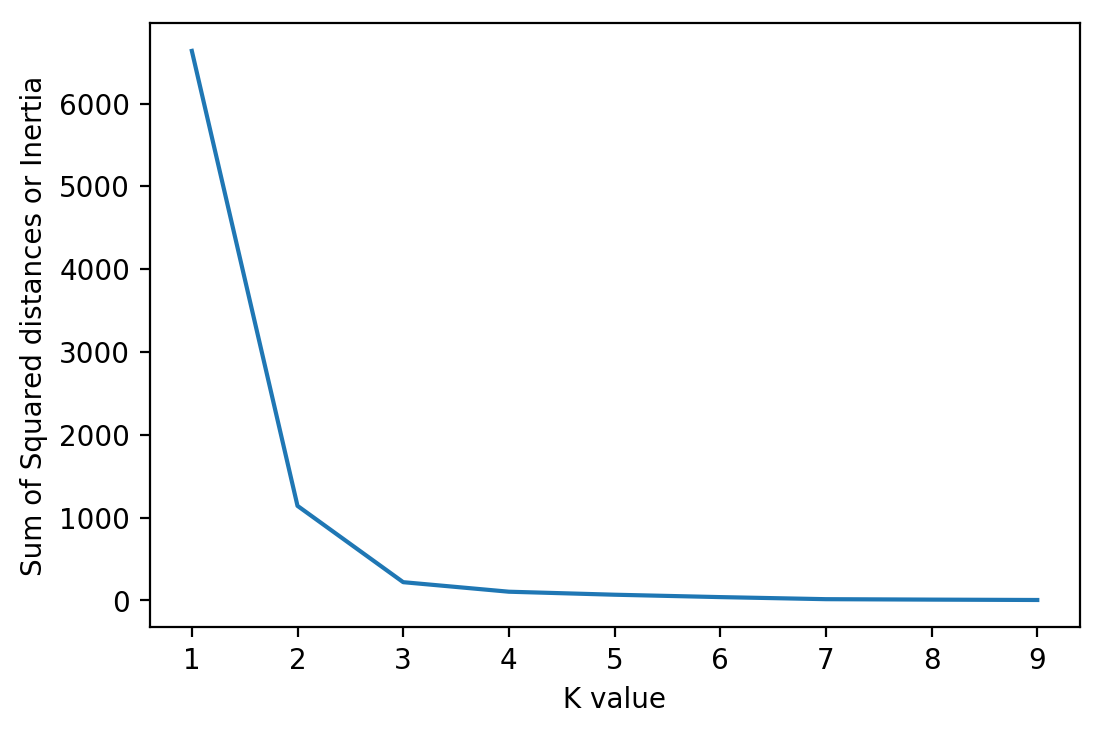

In [126]:
# Hold the interia or sum of squard distances in this array
sum_squares = []

for i in range(1,10) :
    model = KMeans(n_clusters = i, max_iter = 100)
    model.fit(weights.reshape(-1,1))
    
    sum_squares.append(model.inertia_)
    
plt.plot( range(1,10), sum_squares)
plt.xlabel(" K value ")
plt.ylabel("Sum of Squared distances or Inertia")

It does - Now the elbow point moved to a **k** value of 3. Which proves that the elbow method works. Yay !!